Name: Rian Barrett 
Student_ID: 31165176
Tutorial: CL_Chn-20.Menzies_S108

# FIT1043 Assignment 2

# Part A: Classification

## A1. Supervised Learning

### 1. Explain supervised machine learning, the notion of labelled data, and train and test datasets.

All three concepts are related in the sense that they contribute to supervised learning. Supervised machine learning is a style of machine learning where the predictive model is developed based on both input and output data. This connects to the notion of labelled data, and how for supervised machine learning all data is labelled and the predictive model learns to predict the output from the labelled input data. The train and test datasets play a role in the training and evalation of the predictive models. We train the predictive models using the train dataset and then we evaluate the predictive models based on how well they predict the labels for test instances that were not used in training. 

### 2. Read the ‘FIT1043-Essay-Features.csv’ file and separate the features and the label (Hint: the label, in this case, is the ‘score’)

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
essayfeatures = pd.read_csv("FIT1043-Essay-Features.csv")

We read the csv file and first use shape and head function to understand the dataset.

There are 1332 rows and 19 columns with the following features.

In [195]:
essayfeatures.shape

(1332, 19)

In [196]:
essayfeatures.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


We now separate the features and the label using the iloc function and specifying to separate along the columns.

For the feature data we take everything besides score and essayid and for the label we take only score which is the very last column.

In [197]:
#label is the ‘score'
X = essayfeatures.iloc[:,1: 18].values # Feature Data: chars..stemmed
Y = essayfeatures.iloc[:, 18].values # Labeled Data: score


### 3. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.`

We now use the sklearn.model_selection.train_test_split function to split the data for training and testing. We want to keep 75% as the training data so we specify the test_size as 0.25 so its 0.75 train: 0.25 test.

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size = 0.25, random_state = 0)


## A2. Classification (training)

### 1. Explain the difference between binary and multi-class classification.

The difference between binary and multi-class classification is in its name, where binary is the classification in which the data is being classified into two classes for bi-nary. Multi-class classification is the classification in which the data is being classified into more than one class with no restrictions to the number of classes unlike binary classification which will be strictly 2 classes. 

### 2. In preparation for classification, your data should be normalised/scaled.

#### a. Describe what you understand from this need to normalise data (this is in your Week 7 applied session).

Essentially the idea behind needing to normalize data is that we want all our features to have similar/same ranges so that they contribute proportionately to the machine learning algorithms when constructing the machine learning model because unnormalized raw data can have values that vary widely and this may cause one of the features with a broader range of values to affect the machine learning algorithms disproportionately and as a result cause the algorithm to not work properly. 

#### b. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

We use the StandardScaler() function from sklearn.preprocessing to apply the fit_transform() to the training dataset to normalize the data. 

In [199]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3. Use the Support Vector Machine algorithm to build the model.

#### a. Describe SVM. Again, this is not in your lecture content, you need to do some self-learning

Support vector machine is a supervised machine learning algorithm that is primarily used for classification problems to find the best line/decision boundary that best separates the classes for the received data points.

#### b. In SVM, there is something called the kernel. Explain what you understand from it.

The kernel is a function is used for the Linear and Non-linear SVMs to get linear classifiers and nonlinear classifiers respectively. 

The kernel is particularily useful for Non-linear SVMs because Linear SVM linearly separates the datasets with the decision boundary so it is not very complex to calculate the single straight line, however, for the case were Non-linear SVM are needed the datasets are not separable linearly and they require high dimensional spaces for separation. The computation for the decision boundary Non-linear SVM is computationally costly so a kernel is used to get nonlinear classifier without transforming the data and simply requires the dot product of the space, reducing computational cost.

#### c. Write the code to build a predictive SVM model using your training dataset. (Note: You are allowed to engineer or remove features as you deem appropriate)

We use the SVC function from svm to build the predictive SVM model.

In [200]:
from sklearn import svm
SVMclassifier = svm.SVC()
SVMclassifier.fit(X_train, Y_train)

SVC()

### 4. Repeat Task A2.3.c by using another classification algorithm such as Decision Tree or Random Forest algorithms instead of SVM.

We similarly build the model for the Decision Tree algorithm.

In [201]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(
 criterion = 'entropy', random_state = 0
)
DTclassifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## A3. Classification (prediction)

### 1. Using the testing dataset you created in Task A1.3 above, conduct the prediction for the ‘score’ (label) using the two models built by SVM and your other classification algorithm in A.2.4.

After building the model we create the prediction using the model and the test dataset by calling the predict method.

In [202]:
# Predicting the Test set results
SVM_Y_pred = SVMclassifier.predict(X_test)

In [203]:
# Predicting the Test set results
DT_Y_pred = DTclassifier.predict(X_test)

### 2. Display the confusion matrices for both models (it should look like a 6x6 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class classification problem setting.

In [204]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
SVMcm = confusion_matrix(Y_test, SVM_Y_pred)
SVMcm

array([[  0,   2,   0,   0,   0,   0],
       [  0,   8,  13,   2,   0,   0],
       [  0,   1, 103,  43,   0,   0],
       [  0,   0,  34, 109,   1,   0],
       [  0,   0,   0,  16,   0,   0],
       [  0,   0,   0,   1,   0,   0]])

In [205]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
DTcm = confusion_matrix(Y_test, DT_Y_pred)
DTcm

array([[ 0,  2,  0,  0,  0,  0],
       [ 1,  8, 13,  1,  0,  0],
       [ 1,  9, 94, 38,  5,  0],
       [ 0,  1, 46, 90,  7,  0],
       [ 0,  0,  0, 13,  3,  0],
       [ 0,  0,  0,  1,  0,  0]])

### 3. Compare the performance of SVM and your other classifier and provide your justification of which one performed better.

So we have 6x6 classifier and we want to recognize that the 6 values represent the possible values of score.

To find this we check the unique values of the score column in the dataset and then we see how they are ordered in the model with the .class_ function to then understand what each column of the confusion matrix represents.

So from this we know that the the confusion matrix is 6x6 because of the possible values scores.

In [206]:
essayfeatures.iloc[:, 18].unique()

array([4, 3, 2, 1, 5, 6])

In [207]:
SVMclassifier.classes_

array([1, 2, 3, 4, 5, 6])

In [208]:
DTclassifier.classes_

array([1, 2, 3, 4, 5, 6])

To get a more visually appealing confusion matrix we use the ConfusionMatrixDisplay to construct a visual confusion matrix based on the respective confusion matrices.

Text(0.5, 1.0, 'SVM Confusion Matrix')

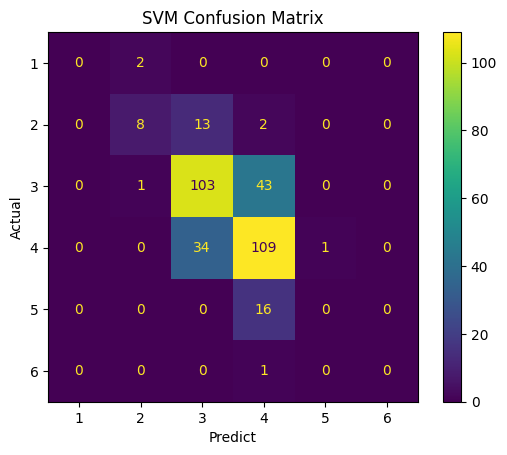

In [209]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay(confusion_matrix = SVMcm, display_labels=['1','2','3','4','5', '6']).plot()
plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title('SVM Confusion Matrix')


Text(0.5, 1.0, 'DT Confusion Matrix')

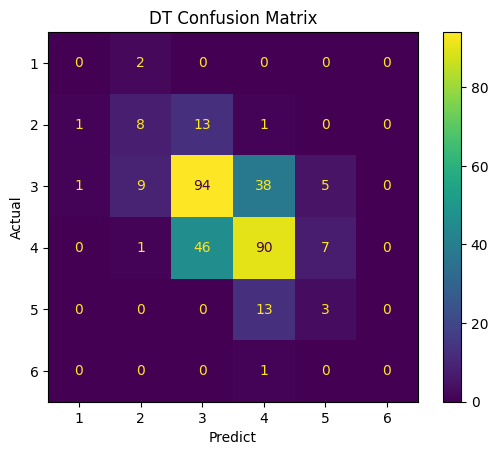

In [210]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay(confusion_matrix = DTcm, display_labels=['1','2','3','4','5', '6']).plot()
plt.ylabel('Actual')
plt.xlabel('Predict')
plt.title('DT Confusion Matrix')


We can then also use the classification_report function to give as a general set of details about the prediction to confirm our calculations which we will perform below in order to compare the performance of the SVM and DT classifier.

In [211]:
print(metrics.classification_report(Y_test,SVM_Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.73      0.35      0.47        23
           3       0.69      0.70      0.69       147
           4       0.64      0.76      0.69       144
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00         1

    accuracy                           0.66       333
   macro avg       0.34      0.30      0.31       333
weighted avg       0.63      0.66      0.64       333



/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
print(metrics.classification_report(Y_test,DT_Y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.40      0.35      0.37        23
           3       0.61      0.64      0.63       147
           4       0.63      0.62      0.63       144
           5       0.20      0.19      0.19        16
           6       0.00      0.00      0.00         1

    accuracy                           0.59       333
   macro avg       0.31      0.30      0.30       333
weighted avg       0.58      0.59      0.58       333



/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Above we got the confusion matrix for both models in 6x6 matrix where we deal with a multi-class classification problem:

In order to compare the performance of the SVM and DT classifier.

We look at the metrics such as Accuracy, Precision and Sensitivity

<b>For the SVM Confusion Matrix:</b>

Accuracy = ( 0 + 8 + 103 + 109 + 0 + 0 )/  (0 + 8 + 103 + 109 + 0 + 0 + 2 + 1 + 13 + 34 + 2 + 43 + 16 + 1 + 1) = 0.66066066066

The accuracy is consistent with the accuracy derived by the classification_report. 


Precision for the scores can be seen in the classification report and the most notable value is the weighted avg precision of 0.63


Sensitivity is equivalent to Recall and the weighted avg recall was 0.66


<b>For the DT Confusion Matrix:</b>

Accuracy = (0 + 8 + 94 + 90 + 3 + 0)/ (0 + 8 + 94 + 90 + 3 + 0 + 1 + 1 + 2 + 9 + 1 + 13 + 46 + 1 + 38 + 13 + 1 + 5 + 7) = 0.58558558558

Precision : the weighted avg precision of 0.58

Sensitivity: weighted avg recall of 0.59

<br>

In conclusion, 
- the accuracy of the SVM classifier is 0.66066066066 and is more accurate than the DT Classifier with an accuracy of 0.58558558558. 
- the precision of the SVM classifier is slightly more precise at 0.63 weight avg compared to 0.58 of the DT classifier.
- Sensitivity for the SVM classfier was better with 0.66 weight avg vs 0.59 for the DT classifer.


The SVM classifier is comparatively better with better Accuracy, Precision, and Sensitivity meaning that the SVM classifer is correct more often and similarly better in terms of precision and sensitivity.

## A4. Independent evaluation (Competition )

### 1. Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the best model you built earlier to predict the ‘score’ for the essays in this file.

Read the csv file 

In [213]:
essayfeaturessubmission = pd.read_csv("FIT1043-Essay-Features-Submission.csv")

Take the values which we will apply to the model to make predictions

In [214]:
X = essayfeaturessubmission.iloc[:,1: 18].values # Feature Data: chars..stemmed

X

array([[4.33200000e+03, 9.00000000e+02, 2.80000000e+01, ...,
        2.17777778e-01, 7.50000000e+02, 7.50000000e+02],
       [1.46500000e+03, 2.80000000e+02, 1.10000000e+01, ...,
        1.82142857e-01, 3.39000000e+02, 3.16000000e+02],
       [1.69600000e+03, 3.25000000e+02, 1.70000000e+01, ...,
        2.83076923e-01, 3.52000000e+02, 3.37000000e+02],
       ...,
       [2.44800000e+03, 4.68000000e+02, 2.20000000e+01, ...,
        2.15811966e-01, 5.40000000e+02, 5.26000000e+02],
       [1.08100000e+03, 2.14000000e+02, 1.40000000e+01, ...,
        2.94392523e-01, 2.59000000e+02, 2.56000000e+02],
       [2.09400000e+03, 4.33000000e+02, 1.10000000e+01, ...,
        2.79445727e-01, 5.01000000e+02, 4.78000000e+02]])

Perform data normalization like before:

In [215]:
sc = StandardScaler()
essayfeaturessubmissiondata = sc.fit_transform(X)

essayfeaturessubmissiondata

array([[ 2.44813079e+00,  2.62564039e+00,  1.14708478e+00, ...,
        -1.15185326e+00,  1.78008704e+00,  1.90750691e+00],
       [-7.71089961e-01, -8.59507981e-01, -3.59354589e-01, ...,
        -2.06154633e+00, -8.29127083e-01, -9.07374369e-01],
       [-5.11710822e-01, -6.06553664e-01,  1.72329896e-01, ...,
         5.15112110e-01, -7.46597196e-01, -7.71170436e-01],
       ...,
       [ 3.32674948e-01,  1.97278945e-01,  6.15400299e-01, ...,
        -1.20203678e+00,  4.46911939e-01,  4.54664959e-01],
       [-1.20226567e+00, -1.23050765e+00, -9.35123465e-02, ...,
         8.03978272e-01, -1.33700331e+00, -1.29652846e+00],
       [-6.48151618e-02,  5.36698161e-04, -3.59354589e-01, ...,
         4.22414449e-01,  1.99322278e-01,  1.43341684e-01]])

Using the SVM model constructed before we can make predictions for score for the essays in the new data in similar way like before.

In [216]:
# Predicting the results
SVM_Y_prediction = SVMclassifier.predict(essayfeaturessubmissiondata)

In [217]:
SVM_Y_prediction

array([4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 4, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4,
       2, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4,
       2, 3, 4, 3, 3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 3, 2, 2, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3])

### 2. Unlike the previous section in which you have a testing dataset where you know the ‘score’ and will be able to test for the accuracy, in this part, you don’t have a ‘score’ and you have to predict it and submit the predictions along with other required submission files.
### a. Output of your predictions should be submitted in a CSV file format. It should contain 2 columns: ‘essayid’ and ‘score’. It should have a total of 200 lines (1 header, and 199 entries).

To construct the output prediction we need the essay_id and score. We ge the essayid from the original dataset and we get the score from the resulting predictions.

In [218]:
essayid = essayfeaturessubmission.iloc[:, 0].values

In [219]:
essayiddf = pd.DataFrame(essayid)

essayiddf.columns =['essayid']
essayiddf

,essayid
0,1623
1,1143
2,660
3,1596
4,846
...,...
194,1226
195,862
196,1562
197,1336


In [220]:
scoredf = pd.DataFrame(SVM_Y_prediction)
scoredf.columns =['score']
scoredf

,score
0,4
1,3
2,3
3,4
4,4
...,...
194,3
195,4
196,4
197,3


To join the two dataframes we use the concatt function and from then we rename the columns to its appropriate name and finally we output the result as csv.

In [221]:
df_output = pd.concat([essayiddf, scoredf], axis=1, ignore_index=True)
df_output

,0,1
0,1623,4
1,1143,3
2,660,3
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


In [222]:
df_output.columns =['essayid','score']
df_output

,essayid,score
0,1623,4
1,1143,3
2,660,3
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


In [242]:
df_output.shape

(199, 2)

In [223]:
df_output.to_csv ('output.csv', index =
None, header=True)

# Part B: Selection of Dataset, Clustering and Video Preparation

## B1. Selection of a Dataset with missing data, Clustering

### 1. Select a suitable dataset that contains some missing data and at least two numerical features. Please note you cannot use the same data set used in the applied sessions/lectures in this unit. Please include a link to your dataset in your report. You may wish to:
### ● provide the direct link to the public dataset from the internet, or
### ● place the data file in your Monash student - google drive and provide its link in the submission.

Link to dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Link to data file: https://drive.google.com/file/d/1Xq5QRkeS62woTon8BjOtBqYa3xmrldGC/view?usp=sharing

### 2. Perform wrangling on the dataset to handle the missing data and explain your procedure

It can be observed that the dataset contains some missing data and at least two numerical features by applying some initial data auditing functions:

In [224]:
lifeexpectancy = pd.read_csv("Life Expectancy Data.csv")

We check the number of rows and columns with the function shape. It can be observed that there are 2938 rows and 22 columns which we make a note of.

In [225]:
lifeexpectancy.shape

(2938, 22)

We can use the functions head and tail to look at the first and last rows of the dataset to understand the type of values we are dealing with.

In [226]:
lifeexpectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [227]:
lifeexpectancy.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


We can use the the info() and describe() functions to get more information about the dataset and we see the following results and how there are some columns with null values.
From below and from the fact that there are 2938 rows in total, we know that there are definitely null values in the columns where the Non-Null value is less than 2938.

In [228]:
lifeexpectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [229]:
lifeexpectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [230]:
lifeexpectancy.describe(include = ['O'])

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


Now we want to perform wrangling on the dataset to handle the missing data.

To perform wrangling on the dataset to handle the missing data we have to decide what we want from the data and this will determine the approach we will take. 

The fact of the matter right now is that we have data values that should be present in a dataset but are missing for any possible reason. So because we are going to be performing k-means clustering the essential question is do we need all the data that have missing values and decide whether we should remove the columns that are missing data or try to find find data that fulfills the missing data based on how feasible that is.

Considering that fact that the missing values spans across multiple countries over multiple years leading to at least 100+ missing values finding the data would be rather unfeasible in a short span. In addition, because we are going to be performing clustering thus grouping a set of data points into different subgroups based on their similarity we can argue that we do not need absolutely all the data to perform meaningful analysis. Therefore it best to try to remove the columns that have missing data.

So to remove the columns that have missing data we use the dropna (inplace=True) function that removes columns that have at least one missing data. Then we get the following new dataframe with 1649 rows and 22 columns.

In [231]:
lifeexpectancy.dropna(inplace=True)
lifeexpectancy
newLE = lifeexpectancy
newLE

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### 3. Perform k-means clustering, choosing two numerical features in your dataset, and apply k-means clustering to your data to create k clusters in Python (k>=2)

We can continue with our dataset, and now we have to decide the two numerical features to perform the k-means clustering. So looking at the head of the dataset the GDP per capita and Number of Infant Deaths per 1000 population were chosen as points of analysis.

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

newLE.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


We can first visualize the dataset and we recognize that there is a set of data points are clearly out of place. Some data points are clearly much larger than 1000 which does not make sense because we are looking at Number of Infant Deaths per 1000 population. So we should remove these data points.

Text(0, 0.5, 'infant deaths_Feature')

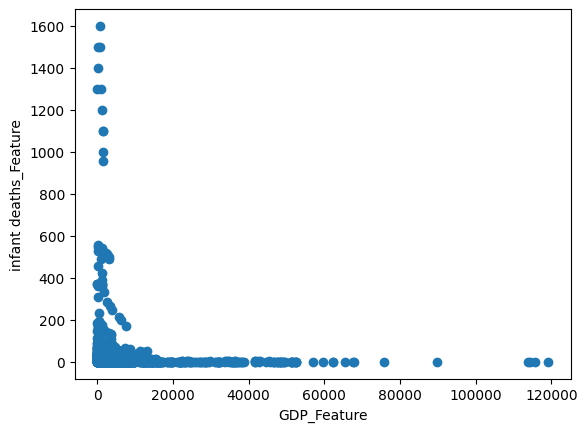

In [233]:
#Visualise the dataset (GDP vs infant deaths)
plt.scatter(x=newLE['GDP'],y=newLE['infant deaths'])
plt.xlabel('GDP_Feature')
plt.ylabel('infant deaths_Feature')

Based on the plot above we don't want the columns with infant deaths greater than around 800. So we can see what columns with greater than 800 looks like and we see that these indian infant death entries seem wrong.

In [234]:
filterDF = newLE[newLE['infant deaths'] > 800]
filterDF

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4


We take the columns that have infant death rates under 800. 

In [235]:
newDF = newLE[newLE['infant deaths'] < 800]
newDF

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Now we plot again with the filtered dataframe, and it seems like there could be about 2 or 3 groups.

Text(0.5, 1.0, 'Visualization of GDP vs Infant Deaths')

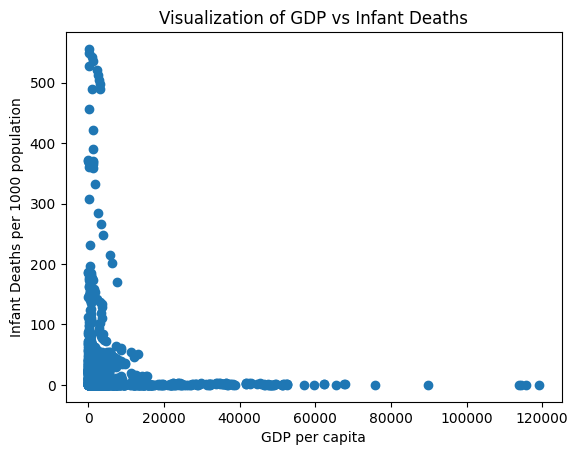

In [236]:
#Visualise the dataset (GDP vs infant deaths)
plt.scatter(x=newDF['GDP'],y=newDF['infant deaths'])
plt.xlabel('GDP per capita')
plt.ylabel('Infant Deaths per 1000 population')
plt.title('Visualization of GDP vs Infant Deaths')

Perform kmeans clustering by setting up the k-means algorithm. The number of clusters were two which is explained later. We then create the cluster centers and the cluster labels.

In [237]:
from sklearn.cluster import KMeans

In [238]:
kmeans = KMeans(n_clusters=2).fit(
 newDF[['GDP','infant deaths']]
)

/Users/rianb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [239]:
kmeans.cluster_centers_

array([[3.09760766e+03, 2.58032573e+01],
       [4.28510555e+04, 1.11650485e+00]])

In [240]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### 4. Visualise the data as well as the results of the k-means clustering, and describe your findings about the identified clusters.

Now the created visulaization of the k-means clustering is the following.

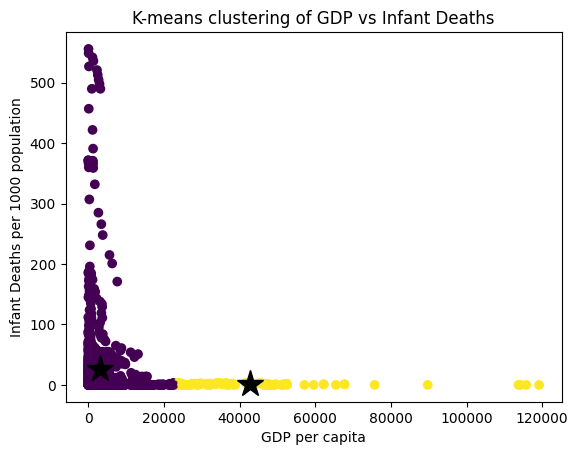

In [241]:
# Visualise the output labels
plt.scatter(
 x=newDF['GDP'],
 y=newDF['infant deaths'],
 c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
 kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 'k*',
 markersize=20
)
plt.xlabel('GDP per capita')
plt.ylabel('Infant Deaths per 1000 population')
plt.title('K-means clustering of GDP vs Infant Deaths')
plt.show()

The k-means clustering was tested with both 2 and 3 clusters but the choice of 2 clusters presented the most well defined group thus 2 clusters was chosen in the final visualization.

The following groups present two populations where Countries that tend to have lower GDP per capita have higher infant deaths per 1000 population. This grouping hints at the multiple factors that contribute to a country's GDP per capita and how those possible factors would also connect to infant deaths in some way or another. So while, not all countries with low GDP will have high infant deaths but in some cases multiple socioeconomics factors may occur together thus creating the two groups of countries with high GDP securely having low infant death rates while some countries with low GDP having high infant death rates.